In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import time
import pickle
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [8]:
# from curl_cffi import requests
# session = requests.Session(impersonate="chrome")

In [9]:
# df=yf.Ticker("TCS.NS", session=session).history(period='5y')
# df=df.drop(["Dividends", "Stock Splits"], axis=1)
# df["Volume"] = df["Volume"].astype('int32')
# df[["Open", "High", "Low", "Close"]] = df[["Open", "High", "Low", "Close"]].astype('float32')
# df.reset_index(inplace=True)
# df["Date"] = df["Date"].dt.tz_localize(None)
# df.set_index("Date", inplace=True)

In [ ]:
# file_pattern = "../../data/NIFTY *.csv"
# csv_files = glob.glob(file_pattern)
# dfs = [pd.read_csv(file) for file in csv_files]
# nifty = pd.concat(dfs, ignore_index=True)
# nifty['Date '] = pd.to_datetime(nifty['Date '], format='%d-%b-%Y')
# nifty=nifty.sort_values(by='Date ')

# nifty.to_csv("../../data/NIFTY.csv", index=False)

In [ ]:
# nifty=pd.read_csv("../../data/NIFTY.csv")
# nifty['Date '] = pd.to_datetime(nifty['Date '])

In [ ]:
# nifty=nifty.rename(columns={
#     'Date ':"Date" , 'Open ': 'Open', 'High ':"High", 'Low ':"Low", 'Close ':"Close",
# })

In [ ]:
FUTURE_WINDOW = 30

In [31]:
nifty.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [4]:
with open('../../data/n200_5yr.pickle', 'rb') as f:
    data = pickle.load(f)

In [5]:
data

,Date,Open,High,Low,Close,Volume,Symbol
0,2019-02-18,1094.297363,1102.318848,1079.620972,1082.882446,29203,ABB
1,2019-02-19,1084.204834,1107.167114,1079.885620,1095.619873,60315,ABB
2,2019-02-20,1106.241333,1123.429932,1097.911499,1102.274780,70442,ABB
3,2019-02-21,1109.767334,1117.700439,1092.137939,1098.043701,55594,ABB
4,2019-02-22,1100.776245,1114.659424,1093.019287,1100.335571,55699,ABB
...,...,...,...,...,...,...,...
1230,2024-02-12,809.750000,863.349976,803.049988,856.650024,6951210,ZYDUSLIFE
1231,2024-02-13,856.000000,866.849976,844.849976,857.799988,1510782,ZYDUSLIFE
1232,2024-02-14,846.000000,872.000000,844.650024,867.799988,884541,ZYDUSLIFE
1233,2024-02-15,872.000000,885.000000,863.450012,878.950012,622903,ZYDUSLIFE


In [34]:
data=data.merge(nifty[["Close","Date"]], on="Date", how="left").rename(columns={"Close_y":"Nifty_Close","Close_x":"Close"})
data

,Date,Open,High,Low,Close,Volume,Symbol,Nifty_Close
0,2019-02-18,1094.297363,1102.318848,1079.620972,1082.882446,29203,ABB,10640.95
1,2019-02-19,1084.204834,1107.167114,1079.885620,1095.619873,60315,ABB,10604.35
2,2019-02-20,1106.241333,1123.429932,1097.911499,1102.274780,70442,ABB,10735.45
3,2019-02-21,1109.767334,1117.700439,1092.137939,1098.043701,55594,ABB,10789.85
4,2019-02-22,1100.776245,1114.659424,1093.019287,1100.335571,55699,ABB,10791.65
...,...,...,...,...,...,...,...,...
236254,2024-02-12,809.750000,863.349976,803.049988,856.650024,6951210,ZYDUSLIFE,21616.05
236255,2024-02-13,856.000000,866.849976,844.849976,857.799988,1510782,ZYDUSLIFE,21743.25
236256,2024-02-14,846.000000,872.000000,844.650024,867.799988,884541,ZYDUSLIFE,21840.05
236257,2024-02-15,872.000000,885.000000,863.450012,878.950012,622903,ZYDUSLIFE,21910.75


In [ ]:
data["t+FW"] = data.groupby("Symbol")["Close"].shift(-FUTURE_WINDOW)

data["Close_pct_chg"] = data.groupby("Symbol")["Close"].pct_change().shift(-1)
data["Nifty_Close_pct_chg"]= data.groupby("Symbol")["Nifty_Close"].pct_change().shift(-1)

data["Nifty_Close_pct_chg_FW"]= data.groupby("Symbol")["Nifty_Close"].pct_change(FUTURE_WINDOW).shift(-FUTURE_WINDOW)
data["Close_pct_chg_FW"] = data.groupby("Symbol")["Close"].pct_change(FUTURE_WINDOW).shift(-FUTURE_WINDOW)

In [ ]:
data[["Date","Close_pct_chg", "Nifty_Close_pct_chg","Close_pct_chg_FW", "Nifty_Close_pct_chg_FW"]].head(35)

,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_30,Nifty_Close_pct_chg_30
0,2019-02-18,0.011762,-0.003440,0.078918,0.089940
1,2019-02-19,0.006074,0.012363,0.108291,0.100110
2,2019-02-20,-0.003838,0.005067,0.116354,0.080951
3,2019-02-21,0.002087,0.000167,0.130569,0.081753
4,2019-02-22,-0.001402,0.008196,0.106745,0.073450
5,2019-02-25,-0.008664,-0.004118,0.129798,0.065863
6,2019-02-26,-0.008659,-0.002644,0.156585,0.074585
7,2019-02-27,0.001633,-0.001309,0.161830,0.081774
8,2019-02-28,0.014221,0.006579,0.150442,0.092161
9,2019-03-01,-0.008678,0.011410,0.154520,0.081861


In [ ]:
indi = data[data["Symbol"]=="INFY"][["Date","Close_pct_chg", "Nifty_Close_pct_chg","Close_pct_chg_FW", "Nifty_Close_pct_chg_FW"]]

In [38]:
indi.head()

,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_30,Nifty_Close_pct_chg_30
118338,2019-02-18,-0.022603,-0.003440,0.009244,0.089940
118339,2019-02-19,0.022643,0.012363,0.048323,0.100110
118340,2019-02-20,-0.009788,0.005067,0.035844,0.080951
118341,2019-02-21,0.002045,0.000167,0.037017,0.081753
118342,2019-02-22,0.027145,0.008196,0.024151,0.073450


In [43]:
def reshape_data(data, time_steps=30):
    A, B = [], []
    for i in range(len(data) - time_steps):
        A.append(data.iloc[i:i + time_steps]["Close_pct_chg"].values)
        B.append(data.iloc[i:i + time_steps]["Nifty_Close_pct_chg"].values)
    return A, B

A,B=reshape_data(indi[["Close_pct_chg", "Nifty_Close_pct_chg"]])

In [44]:
indi

,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_30,Nifty_Close_pct_chg_30
118338,2019-02-18,-0.022603,-0.003440,0.009244,0.089940
118339,2019-02-19,0.022643,0.012363,0.048323,0.100110
118340,2019-02-20,-0.009788,0.005067,0.035844,0.080951
118341,2019-02-21,0.002045,0.000167,0.037017,0.081753
118342,2019-02-22,0.027145,0.008196,0.024151,0.073450
...,...,...,...,...,...
119568,2024-02-12,0.002649,0.005885,NaN,NaN
119569,2024-02-13,-0.010893,0.004452,NaN,NaN
119570,2024-02-14,0.006092,0.003237,NaN,NaN
119571,2024-02-15,0.015092,0.005931,NaN,NaN


In [ ]:
new_indi = indi.iloc[:-FUTURE_WINDOW].copy()
new_indi.shape

(1205, 5)

In [46]:
new_indi["prices"] = A
new_indi["nifty"] = B

In [48]:
new_indi.head(30)

,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_30,Nifty_Close_pct_chg_30,prices,nifty
118338,2019-02-18,-0.022603,-0.003440,0.009244,0.089940,"[-0.022603095, 0.022642612, -0.009788096, 0.00...","[-0.003439542522049255, 0.012362851094126492, ..."
118339,2019-02-19,0.022643,0.012363,0.048323,0.100110,"[0.022642612, -0.009788096, 0.0020450354, 0.02...","[0.012362851094126492, 0.005067323679957436, 0..."
118340,2019-02-20,-0.009788,0.005067,0.035844,0.080951,"[-0.009788096, 0.0020450354, 0.027144909, -0.0...","[0.005067323679957436, 0.00016682344981622244,..."
118341,2019-02-21,0.002045,0.000167,0.037017,0.081753,"[0.0020450354, 0.027144909, -0.016426146, -0.0...","[0.00016682344981622244, 0.00819615165428833, ..."
118342,2019-02-22,0.027145,0.008196,0.024151,0.073450,"[0.027144909, -0.016426146, -0.009764373, -0.0...","[0.00819615165428833, -0.004117609213150741, -..."
118343,2019-02-25,-0.016426,-0.004118,-0.016161,0.065863,"[-0.016426146, -0.009764373, -0.0012921095, 0....","[-0.004117609213150741, -0.0026441353723477556..."
118344,2019-02-26,-0.009764,-0.002644,0.007071,0.074585,"[-0.009764373, -0.0012921095, 0.010350108, -0....","[-0.0026441353723477556, -0.001309378947222272..."
118345,2019-02-27,-0.001292,-0.001309,-0.010541,0.081774,"[-0.0012921095, 0.010350108, -0.012670398, 0.0...","[-0.0013093789472222728, 0.006578642575862936,..."
118346,2019-02-28,0.010350,0.006579,-0.013891,0.092161,"[0.010350108, -0.012670398, 0.0, -0.013037264,...","[0.006578642575862936, 0.011409766649790543, 0..."
118347,2019-03-01,-0.012670,0.011410,-0.033495,0.081861,"[-0.012670398, 0.0, -0.013037264, -0.014662325...","[0.011409766649790543, 0.005965897455733504, 0..."


In [54]:
new_indi.iloc[0]["nifty"]

array([-0.00343954,  0.01236285,  0.00506732,  0.00016682,  0.00819615,
       -0.00411761, -0.00264414, -0.00130938,  0.00657864,  0.01140977,
        0.0059659 ,  0.00047046, -0.00206182,  0.01202041,  0.0119224 ,
        0.00358369,  0.00013666,  0.00737002,  0.00309359,  0.00612448,
       -0.00098418, -0.00556807, -0.00895967,  0.01136138, -0.00332658,
        0.01091738,  0.00856958,  0.00377491, -0.00591213, -0.00394626])

In [55]:
def regress(df):
    X, y = df["nifty"], df["prices"]
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    df["alpha"]=model.intercept_
    df["beta"]=model.coef_[0]
    return df

new_indi = new_indi.apply(regress, axis=1)

In [56]:
new_indi

,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_30,Nifty_Close_pct_chg_30,prices,nifty,alpha,beta
118338,2019-02-18,-0.022603,-0.003440,0.009244,0.089940,"[-0.022603095, 0.022642612, -0.009788096, 0.00...","[-0.003439542522049255, 0.012362851094126492, ...",-0.002025,0.835399
118339,2019-02-19,0.022643,0.012363,0.048323,0.100110,"[0.022642612, -0.009788096, 0.0020450354, 0.02...","[0.012362851094126492, 0.005067323679957436, 0...",-0.000781,0.759842
118340,2019-02-20,-0.009788,0.005067,0.035844,0.080951,"[-0.009788096, 0.0020450354, 0.027144909, -0.0...","[0.005067323679957436, 0.00016682344981622244,...",-0.000128,0.526100
118341,2019-02-21,0.002045,0.000167,0.037017,0.081753,"[0.0020450354, 0.027144909, -0.016426146, -0.0...","[0.00016682344981622244, 0.00819615165428833, ...",-0.000088,0.519874
118342,2019-02-22,0.027145,0.008196,0.024151,0.073450,"[0.027144909, -0.016426146, -0.009764373, -0.0...","[0.00819615165428833, -0.004117609213150741, -...",-0.000504,0.576452
...,...,...,...,...,...,...,...,...,...
119538,2023-12-28,-0.012639,-0.002172,0.075161,-0.007468,"[-0.012638807, 0.005476713, -0.010925949, -0.0...","[-0.0021718468044464867, 0.0004831718158977427...",0.002816,1.002322
119539,2023-12-29,0.005477,0.000483,0.091808,0.000545,"[0.005476713, -0.010925949, -0.028936386, 0.01...","[0.0004831718158977427, -0.003500154080370299,...",0.003058,0.973057
119540,2024-01-01,-0.010926,-0.003500,0.074032,0.004514,"[-0.010925949, -0.028936386, 0.015234828, 0.01...","[-0.003500154080370299, -0.0068518125340398806...",0.002390,0.937951
119541,2024-01-02,-0.028936,-0.006852,0.092512,0.011306,"[-0.028936386, 0.015234828, 0.01312232, -0.006...","[-0.0068518125340398806, 0.006564470067178307,...",0.002754,0.921203


In [57]:
new_indi["Excess_Return"] = new_indi["Close_pct_chg_30"] - (new_indi["alpha"] + new_indi["beta"] * new_indi["Nifty_Close_pct_chg_30"])

In [58]:
new_indi

,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_30,Nifty_Close_pct_chg_30,prices,nifty,alpha,beta,Excess_Return
118338,2019-02-18,-0.022603,-0.003440,0.009244,0.089940,"[-0.022603095, 0.022642612, -0.009788096, 0.00...","[-0.003439542522049255, 0.012362851094126492, ...",-0.002025,0.835399,-0.063867
118339,2019-02-19,0.022643,0.012363,0.048323,0.100110,"[0.022642612, -0.009788096, 0.0020450354, 0.02...","[0.012362851094126492, 0.005067323679957436, 0...",-0.000781,0.759842,-0.026964
118340,2019-02-20,-0.009788,0.005067,0.035844,0.080951,"[-0.009788096, 0.0020450354, 0.027144909, -0.0...","[0.005067323679957436, 0.00016682344981622244,...",-0.000128,0.526100,-0.006616
118341,2019-02-21,0.002045,0.000167,0.037017,0.081753,"[0.0020450354, 0.027144909, -0.016426146, -0.0...","[0.00016682344981622244, 0.00819615165428833, ...",-0.000088,0.519874,-0.005397
118342,2019-02-22,0.027145,0.008196,0.024151,0.073450,"[0.027144909, -0.016426146, -0.009764373, -0.0...","[0.00819615165428833, -0.004117609213150741, -...",-0.000504,0.576452,-0.017685
...,...,...,...,...,...,...,...,...,...,...
119538,2023-12-28,-0.012639,-0.002172,0.075161,-0.007468,"[-0.012638807, 0.005476713, -0.010925949, -0.0...","[-0.0021718468044464867, 0.0004831718158977427...",0.002816,1.002322,0.079830
119539,2023-12-29,0.005477,0.000483,0.091808,0.000545,"[0.005476713, -0.010925949, -0.028936386, 0.01...","[0.0004831718158977427, -0.003500154080370299,...",0.003058,0.973057,0.088219
119540,2024-01-01,-0.010926,-0.003500,0.074032,0.004514,"[-0.010925949, -0.028936386, 0.015234828, 0.01...","[-0.003500154080370299, -0.0068518125340398806...",0.002390,0.937951,0.067408
119541,2024-01-02,-0.028936,-0.006852,0.092512,0.011306,"[-0.028936386, 0.015234828, 0.01312232, -0.006...","[-0.0068518125340398806, 0.006564470067178307,...",0.002754,0.921203,0.079343


In [ ]:
new_indi[new_indi["Excess_Return"] > 0.1]

,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_30,Nifty_Close_pct_chg_30,prices,nifty,alpha,beta,Excess_Return
118407,2019-06-04,-0.012556,-0.005534,0.095292,-0.027796,"[-0.012556255, 0.0004080534, 0.0047580004, 0.0...","[-0.005534162492606631, -0.01479830139789462, ...",0.003037,0.598793,0.108899
118408,2019-06-06,0.000408,-0.014798,0.092846,-0.020842,"[0.0004080534, 0.0047580004, 0.01948297, 0.001...","[-0.01479830139789462, 0.002271240105540917, 0...",0.003678,0.577778,0.101210
118413,2019-06-13,-0.000874,0.000659,0.069818,-0.055556,"[-0.00087434053, -0.0029623508, 0.00013518333,...","[0.0006593203541012116, -0.007617057171994457,...",0.003125,0.632409,0.101827
118422,2019-06-26,-0.011897,0.004332,0.049919,-0.083735,"[-0.011896849, -0.0117019415, 0.0019848347, -0...","[0.004331811689109788, -0.0005064338196504314,...",0.002992,0.694750,0.105101
118423,2019-06-27,-0.011702,-0.000506,0.079666,-0.068327,"[-0.0117019415, 0.0019848347, -0.0009563565, 0...","[-0.0005064338196504314, -0.004450430897982027...",0.003945,0.760305,0.127671
...,...,...,...,...,...,...,...,...,...,...
119223,2022-09-19,0.009622,0.005214,0.129451,0.026137,"[0.009621978, -0.0012585521, -0.00813812, -0.0...","[0.005213666194166411, 0.011008809885230342, -...",0.003929,0.802930,0.104536
119224,2022-09-20,-0.001259,0.011009,0.114457,0.013272,"[-0.0012585521, -0.00813812, -0.006752491, -0....","[0.011008809885230342, -0.00549498351224309, -...",0.003405,0.822070,0.100141
119431,2023-07-21,-0.081338,-0.011720,0.100255,-0.010950,"[-0.081338406, 0.0037548542, -0.0014962554, 0....","[-0.011719717805812602, -0.003679412509496105,...",0.001817,1.978176,0.120098
119432,2023-07-24,0.003755,-0.003679,0.106464,-0.004954,"[0.0037548542, -0.0014962554, 0.010677338, 0.0...","[-0.003679412509496105, 0.00041937033450500927...",0.003567,0.960512,0.107655


In [59]:
train_bef =new_indi[["Date", "Close_pct_chg", "Nifty_Close_pct_chg", "Excess_Return" ]] # where excess return is 30days future return without market influence

In [63]:
train_bef["Excess_Return"] = train_bef["Excess_Return"].shift(-1)

/var/folders/jf/1r7jb1_s6ys1p0n0n56s2qsh0000gn/T/ipykernel_5497/3228097299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_bef["Excess_Return"] = train_bef["Excess_Return"].shift(-1)


Now I want to build a data which should contain 30 days prev price data, and n+30 excess return

In [68]:
train_bef = train_bef.dropna()

In [74]:
train_bef.head(31)

,Date,Close_pct_chg,Nifty_Close_pct_chg,Excess_Return
118338,2019-02-18,-0.022603,-0.003440,-0.026964
118339,2019-02-19,0.022643,0.012363,-0.006616
118340,2019-02-20,-0.009788,0.005067,-0.005397
118341,2019-02-21,0.002045,0.000167,-0.017685
118342,2019-02-22,0.027145,0.008196,-0.045619
118343,2019-02-25,-0.016426,-0.004118,-0.022347
118344,2019-02-26,-0.009764,-0.002644,-0.036361
118345,2019-02-27,-0.001292,-0.001309,-0.040358
118346,2019-02-28,0.010350,0.006579,-0.056576
118347,2019-03-01,-0.012670,0.011410,-0.029828


In [ ]:
price,nifty,returns=[], [], []
for i in range(0, len(train_bef)-FUTURE_WINDOW):
    price.append(train_bef.iloc[i:i+FUTURE_WINDOW]["Close_pct_chg"].values)
    nifty.append(train_bef.iloc[i:i+FUTURE_WINDOW]["Nifty_Close_pct_chg"].values)
    returns.append(train_bef.iloc[i+FUTURE_WINDOW]["Excess_Return"])

In [70]:
price[0]

array([-0.02260309,  0.02264261, -0.0097881 ,  0.00204504,  0.02714491,
       -0.01642615, -0.00976437, -0.00129211,  0.01035011, -0.0126704 ,
        0.        , -0.01303726, -0.01466233, -0.001544  , -0.006046  ,
        0.00212193, -0.00014126,  0.01439977, -0.01162058,  0.01696706,
        0.02312219,  0.00561607, -0.01056379, -0.01020056,  0.00267935,
        0.01110065,  0.02344811,  0.00569439, -0.00803256, -0.00716835])

In [ ]:
returns

[-0.005865090857843917]

In [75]:
final_df = pd.DataFrame({
    "price": price,
    "nifty": nifty,
    "returns": returns
})

In [76]:
final_df.to_parquet("../../data/indi_final_df.parquet")

<Axes: >

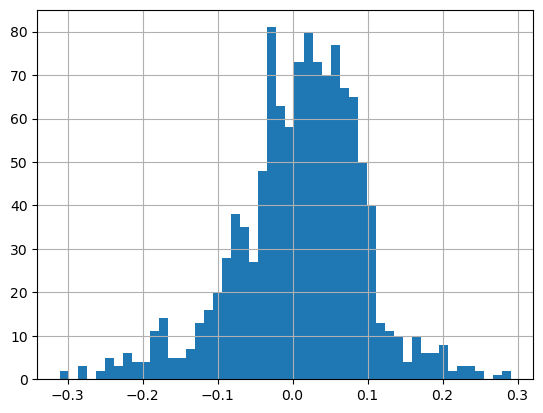

In [87]:
final_df["returns"].hist(bins=50)

<Axes: >

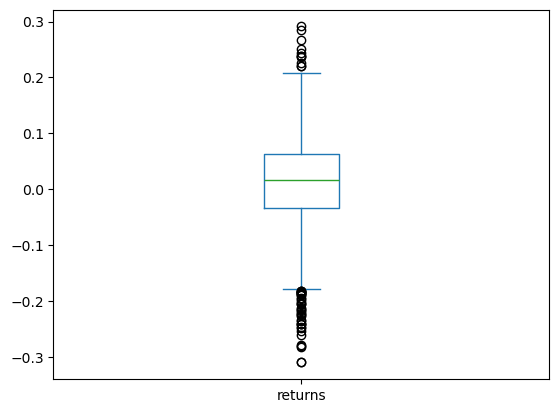

In [88]:
final_df["returns"].plot(kind="box")

In [89]:
final_df["direction"] = np.where(final_df['returns'] > 0, 1,0 )

In [95]:
X = np.stack(final_df.apply(lambda row: np.concatenate([row['price'], row['nifty']]), axis=1)).T
X = X.T  # shape: (n_samples, 60)
y = final_df['direction'].values

In [94]:
final_df["direction"].value_counts()

direction
1    687
0    487
Name: count, dtype: int64

In [96]:
import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.644710
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1174
Model:                          Logit   Df Residuals:                     1113
Method:                           MLE   Df Model:                           60
Date:                Sat, 24 May 2025   Pseudo R-squ.:                 0.04989
Time:                        19:27:42   Log-Likelihood:                -756.89
converged:                       True   LL-Null:                       -796.64
Covariance Type:            nonrobust   LLR p-value:                   0.04687
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4109      0.066      6.246      0.000       0.282       0.540
x1             0.2906      4.

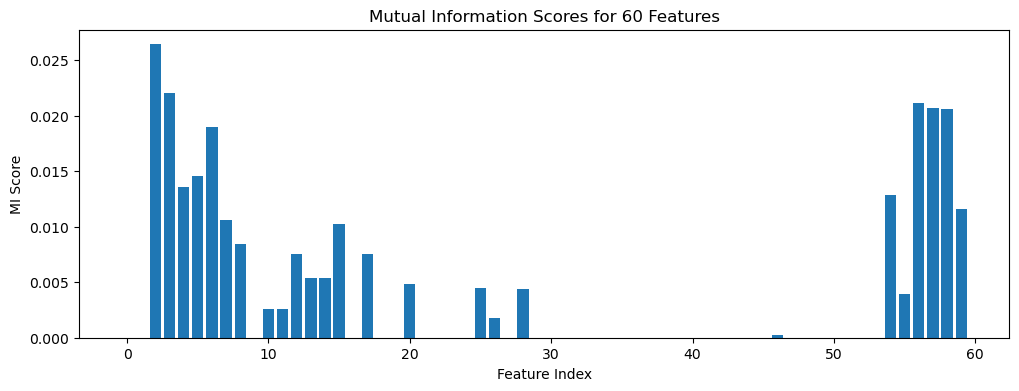

In [97]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.bar(range(len(mi)), mi)
plt.title("Mutual Information Scores for 60 Features")
plt.xlabel("Feature Index")
plt.ylabel("MI Score")
plt.show()